In [58]:
!pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.2/9.2 MB 3.1 MB/s eta 0:00:03
     -                                        0.3/9.2 MB 3.5 MB/s eta 0:00:03
     ---                                      0.7/9.2 MB 4.9 MB/s eta 0:00:02
     ----                                     1.0/9.2 MB 5.4 MB/s eta 0:00:02
     -----                                    1.4/9.2 MB 5.7 MB/s eta 0:00:02
     -------                                  1.7/9.2 MB 6.0 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 6.2 MB/s eta 0:00:02
     ---------                                2.3/9.2 MB 6.3 MB/s eta 0:00:02
     ---------                                2.3/9.2 MB 6.3 MB/s eta 0:00:02
     ---------                                2.3/9.2 MB 6.3 MB/s eta 0:00:02
     ----------                               2.4/9.2 MB 4.7 MB/s eta 0:00:02
     -------------                            3.0/9.2 MB 5.4 MB/s eta 0

In [8]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 470.9/470.9 kB 4.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 1.9/1.9 MB 4.8 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
     ---------------------------------------- 2.5/2.5 MB 4.6 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\dpalm\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import kaggle 
from sklearn.preprocessing import LabelEncoder


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi 

In [4]:
api = KaggleApi()
api.authenticate()

In [2]:
api.dataset_download_file('chitwanmanchanda/fraudulent-transactions-data',
                         file_name='Fraud.csv')

NameError: name 'api' is not defined

In [3]:
import zipfile

In [4]:
with zipfile.ZipFile('Fraud.csv.zip','r') as zipref:
    zipref.extractall()

In [70]:
#inspect data set 
Fraud_df = pd.read_csv('Fraud.csv')
Fraud_df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [8]:
Fraud_df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
Fraud_df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [8]:
Fraud_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [71]:
#create numerical values for categorical values
type_n=[]
type_dic={'CASH_OUT':5,'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1}


In [72]:
for i in range(len(Fraud_df.type)):
    type_n.append(type_dic[Fraud_df.type[i]])


In [73]:
Fraud_df['type_n']=type_n
Fraud_df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_n
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,4
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,4
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,2
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,5
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,4
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,4
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,4
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,4
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,4
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,1


In [12]:
#Vizualize Data set
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: >

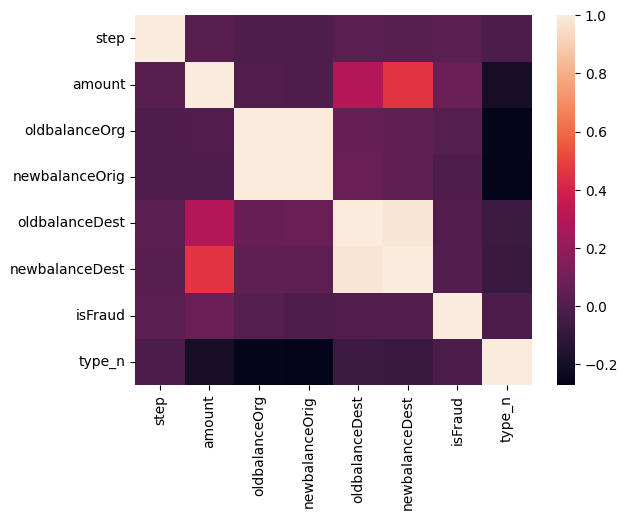

In [18]:
#Visualize feature correlation 
sns.heatmap(data=Fraud_df.drop(['type','nameDest','nameOrig','isFlaggedFraud'], axis=1).corr())


<Axes: xlabel='newbalanceDest', ylabel='amount'>

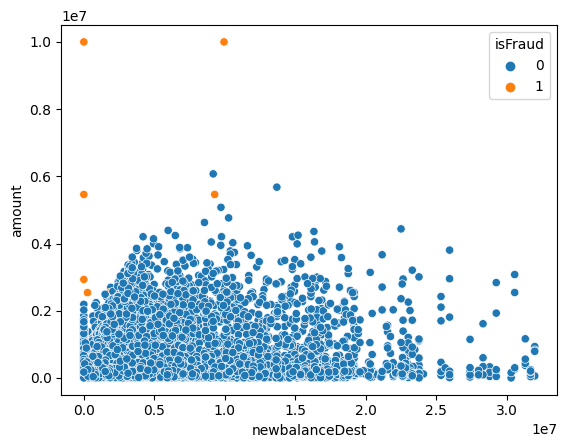

In [108]:
sns.scatterplot(
    data=Fraud_df[1:80000], 
    x='newbalanceDest',
    y='amount', 
    hue='isFraud',
    
)


(-10000.0, 1000000.0)

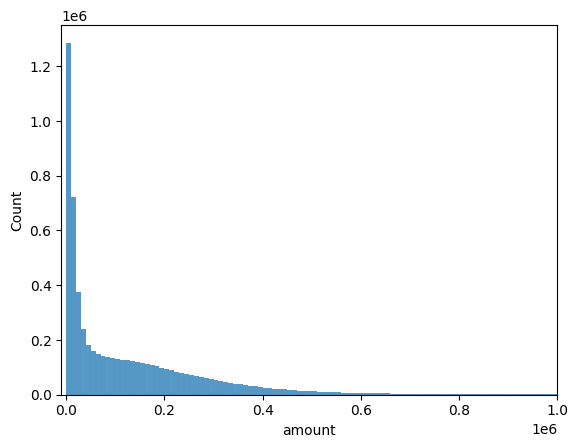

In [78]:
#create categories for ammounts spent to see where $ammount where most transactions are being labeled fraud
tenk_bin= round(Fraud_df.amount.max()/10000,0)


#visualize ammount distribution 
fig, ax= plt.subplots()
sns.histplot(Fraud_df.amount,
        bins=int(tenk_bin),
             )

ax.set_xlim(-10000,1000000)
    

In [74]:
Fraud_df.set_index('isFraud',inplace=True)
is_fraud_df=Fraud_df.loc[1]
Fraud_df.reset_index(inplace=True)


(-10000.0, 1000000.0)

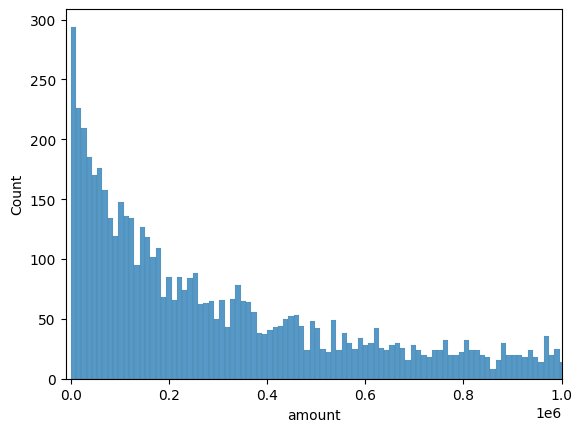

In [81]:
#visualize ammount distribution for fraudulent transacrtions 
tenk_bin= round(Fraud_df.amount.max()/100000,0)
fig, ax= plt.subplots()
sns.histplot(is_fraud_df.amount,
        bins=int(tenk_bin),
             )

ax.set_xlim(-10000,1000000)

<Axes: xlabel='type', ylabel='Count'>

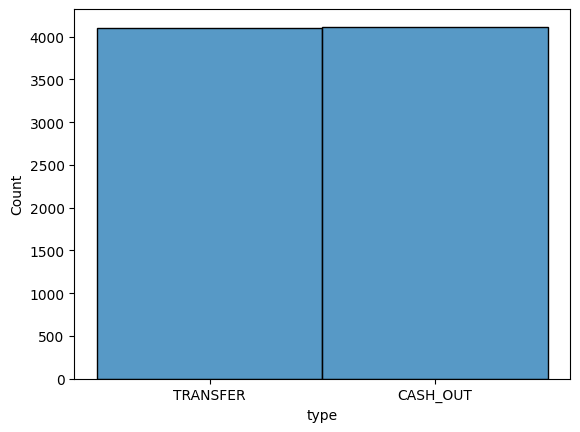

In [77]:
is_fraud_df.head()
sns.histplot(is_fraud_df.type)




In [13]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split


In [14]:
Fraud_df_clean =Fraud_df.drop(['type','nameDest','nameOrig','isFlaggedFraud'], axis=1)

y= Fraud_df['isFraud']
x=Fraud_df_clean.drop(['isFraud'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [16]:
#Preprocessing the data set          
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

train_x_sc=scaler.fit_transform(x_train)
test_x_sc=scaler.fit_transform(x_test)


In [53]:
from sklearn.base import BaseEstimator, TransformerMixin 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def _init_(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x,y=None):
        return self
    def transform(self,x):
        return X[self.attribute_names].values

In [18]:
#training logistic regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
Lr_model=LogisticRegression()
Lr_model.fit(train_X_sc, y_train)

LogisticRegression()

In [79]:
#test Logistic regression model
Lr_predictions = Lr_model.predict(test_x_sc)

In [81]:
accuracy = accuracy_score(y_test,Lr_predictions)
print('Accuracy:',accuracy)

Accuracy: 0.9991937283697596


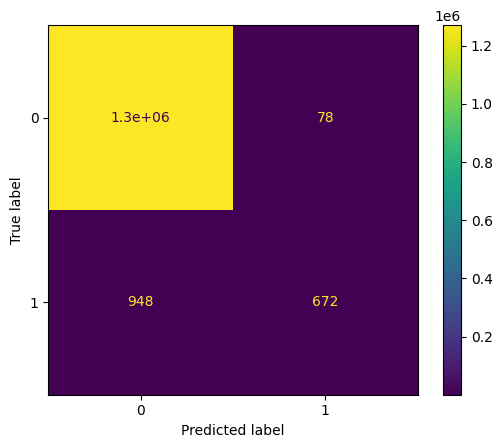

In [87]:
lr_cm=confusion_matrix(y_test,Lr_predictions)
ConfusionMatrixDisplay(lr_cm).plot()


In [34]:
# % of total fraud cases predicted correctly 
def fraud_acc(x,y):
    z=x/(x+y)*100
    return z

lin=fraud_acc(672,948)


In [13]:
#training KNN model
from sklearn.neighbors import KNeighborsClassifier

In [14]:
#K=5
Kn_model=KNeighborsClassifier(n_neighbors=5)
Kn_model.fit(train_x_sc,y_train)

KNeighborsClassifier()

In [15]:
kn_pred=Kn_model.predict(test_x_sc)
kn_accuracy= accuracy_score(y_test,kn_pred)
print('Knn Accuracy:',kn_accuracy)

Knn Accuracy: 0.9995159226859376


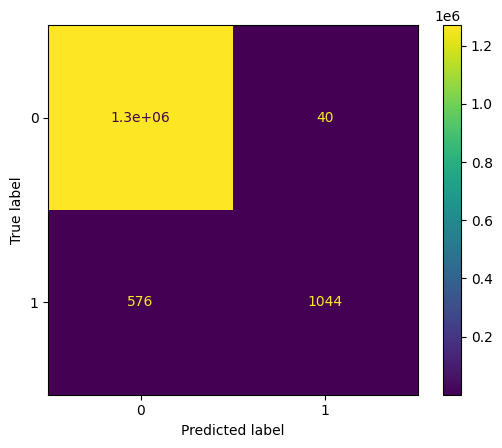

In [16]:
knn_cm=confusion_matrix(y_test,kn_pred)
ConfusionMatrixDisplay(knn_cm).plot()

In [33]:
knn=fraud_acc(1044,576)

In [1]:
from sklearn.tree import DecisionTreeClassifier  # For classification tasks



In [26]:
tree_pred= DecisionTreeClassifier()
tree_pred.fit(train_x_sc,y_train)

DecisionTreeClassifier()

In [27]:
tree_pred=tree_pred.predict(test_x_sc)
tree_acc=accuracy_score(y_test,tree_pred)
print("decision tree acuracy", tree_acc)

decision tree acuracy 0.9992581672329952


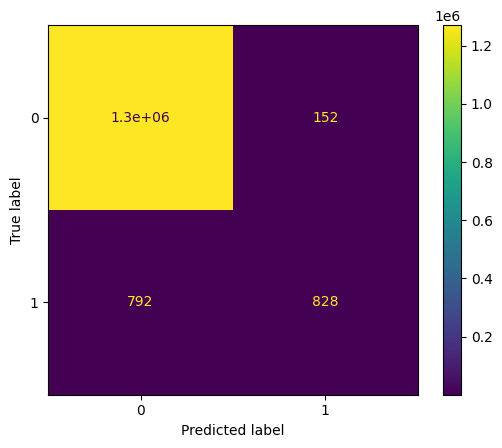

In [28]:
tree_cm=confusion_matrix(y_test,tree_pred)
ConfusionMatrixDisplay(tree_cm).plot()


In [32]:
tree=fraud_acc(828,792)

In [38]:
print('Model Comparison:\n','Knn:',knn,
      '\n Decision Tree:',tree,
      '\n Logistic Regression:',lin)

Model Comparison:
 Knn: 64.44444444444444 
 Decision Tree: 51.11111111111111 
 Logistic Regression: 41.48148148148148
